In [43]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import os

In [4]:
folder_path = '/home/piai/python_study/Posco_AI_Big_data_Academy_Practice/실습파일/1 Big Data 분석 기초'

### 실습1 (기술통계)

In [5]:
mycars = pd.read_csv(os.path.join(folder_path, 'mycars.csv'))
mycars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     234 non-null    object 
 1   model            234 non-null    object 
 2   displacement     234 non-null    float64
 3   year             234 non-null    int64  
 4   cylinder         234 non-null    int64  
 5   automatic        234 non-null    object 
 6   driving          234 non-null    object 
 7   mpg              234 non-null    int64  
 8   highway_mileage  234 non-null    int64  
 9   fuel             234 non-null    object 
 10  class            234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [6]:
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [7]:
df = mycars[['mpg', 'driving']]
df.groupby('driving').describe()

mpg                                                   
         count       mean       std   min   25%   50%   75%   max
driving                                                          
4        103.0  14.330097  2.874459   9.0  13.0  14.0  16.0  21.0
f        106.0  19.971698  3.626510  11.0  18.0  19.0  21.0  35.0
r         25.0  14.080000  2.215852  11.0  12.0  15.0  15.0  18.0

In [8]:
df = mycars[['highway_mileage', 'driving']]
df.groupby('driving').describe()

highway_mileage                                                   
                  count       mean       std   min   25%   50%   75%   max
driving                                                                   
4                 103.0  19.174757  4.078704  12.0  17.0  18.0  22.0  28.0
f                 106.0  28.160377  4.206881  17.0  26.0  28.0  29.0  44.0
r                  25.0  21.000000  3.662877  15.0  17.0  21.0  24.0  26.0

### 실습2 (기술통계)

In [9]:
df = mycars[['model', 'driving']]

count = df['driving'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count / sum(count) * 100
cumpct = np.cumsum(percent)

count_data = pd.DataFrame({'Count': count, 'CumCnt': cumcnt, 'Percent': percent, 'CumPct': cumpct})
count_data.columns.name='driving'
count_data

driving,Count,CumCnt,Percent,CumPct
4,103,103,44.017094,44.017094
f,106,209,45.299145,89.316239
r,25,234,10.683761,100.000000


In [10]:
df = mycars[['model', 'driving']]
count = df['model'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count / sum(count) * 100
cumpct = np.cumsum(percent)

count_data = pd.DataFrame({'Count': count, 'CumCnt': cumcnt, 'Percent': percent, 'CumPct': cumpct})
count_data.columns.name='model'
count_data.head()

model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513


### 실습3 (확률계산)

In [11]:
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x, mu, sigma)
print("나의 키가 {0}cm일 경우에 나는 {1:.1f}% 범위에 위치".format(x, (1-prob)*100))

나의 키가 180cm일 경우에 나는 15.9% 범위에 위치


### 실습4 (확률계산)

In [12]:
mu = 12
sigma = 3
x1 = 15

prob1 = stats.norm.cdf(x1, mu, sigma)
print("1리터를 가지고 {0}km 이상 {1}km 이하를 달릴 확률은 얼마인가요? {2:.1f}%".format(mu+(mu-x1), x1, (1-2*(1-prob1))*100))
print("1리터를 가지고 {0}km 이상을 달릴 확률은 얼마인가요? {1:.1f}%".format(x1, (1-prob1)*100))

1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 얼마인가요? 68.3%
1리터를 가지고 15km 이상을 달릴 확률은 얼마인가요? 15.9%


### 실습5 (t 분포)

In [13]:
t = 2.0
df = 100

prob = stats.t.cdf(t, df)
print("P(T<=t): {:.3f}".format(prob))

P(T<=t): 0.976


### 실습6 (카이 제곱 분포)

In [14]:
chisq = 3
df = 8

prob = stats.t.cdf(t, df)
print("P(X<={0}) : {1:.4f}".format(chisq,prob))

P(X<=3) : 0.9597


### 실습7 (F분포)

In [15]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850


### 실습8 (이항 분포)

In [16]:
n = 5
for i in range(n+1):
    prob = stats.binom.pmf(k = i, n = n, p = 0.3)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


### 실습9 (정규성 검정)

In [17]:
df = pd.read_csv(os.path.join(folder_path, '2sample_t_test.csv'))

statistic1, p1 = stats.shapiro(df['Mat_A'])
statistic2, p2 = stats.shapiro(df['Mat_B'])

print("Shapiro-Wilk Mat_A Test: statistic={}, p-value={}".format(statistic1, p1))
print()
print("Shapiro-Wilk Mat_B Test: statistic={}, p-value={}".format(statistic2, p2))
# df.info()
# df.isnull()
# statistic, p = stats.shapiro(df['Supp1'])
# statistic, p

Shapiro-Wilk Mat_A Test: statistic=0.906264066696167, p-value=0.2563020884990692

Shapiro-Wilk Mat_B Test: statistic=0.9729753732681274, p-value=0.9169775247573853


MAT_A와 MAT_B 모두 정규성 검정결과(95% 신뢰수준 사용시) p-value가 0.05보다 크므로 정규분포를 따른다고 볼 수 있다.

### 실습10 (모평균 구간추정)

In [18]:
df = pd.DataFrame({"sample": [18, 18, 20, 21, 20, 23, 19, 18, 17, 21,
                              22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
df.head()

lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 0.38/np.sqrt(20))
print("신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([19.33], [19.67])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


신품종 배추의 평균 무게에 대한 95% 신뢰구간은 [19.33, 19.67]이다

### 실습11(모평균 신뢰구간 추정 - 모표준편차를 모르는 경우)

In [19]:
df = pd.DataFrame({'sample': [73, 71, 74, 69, 70, 73, 70, 68, 75, 72,
                              70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})

lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([70.6], [72.4])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


모표준편차를 모르는 상태에서 강종의 모평균값의 95% 신뢰구간은 [70.6, 72.4]이다

### 실습12 (1-Sample t-test)

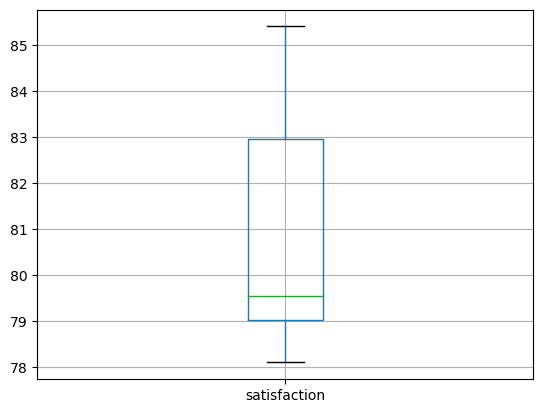

In [20]:
df = pd.DataFrame({'satisfaction': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

df.boxplot()

plt.show()

In [21]:
statistic, p = stats.shapiro(df['satisfaction'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.8473217487335205, p-value=0.0539751797914505


In [22]:
t_result = stats.ttest_1samp(df, 78)
t, p = t_result.statistic.round(3), \
t_result.pvalue.round(3)

print("1-Sample t-test")
print("t통계량:{}".format(t))
print("p-value:{}".format(p))

1-Sample t-test
t통계량:[3.379]
p-value:[0.008]


문제에서의 귀무 가설은 '개선 활동이 만족도를 변화시키지 않는다'이다.

유의수준 5%에서 검정 결과 p-value가 0.008이므로 귀무 가설을 기각하며 개선 활동이 만족도를 변화시킨다는 걸 알 수 있다.

### 실습13 (2-Sample t-test): 두 집단 간 평균이 같은지 비교

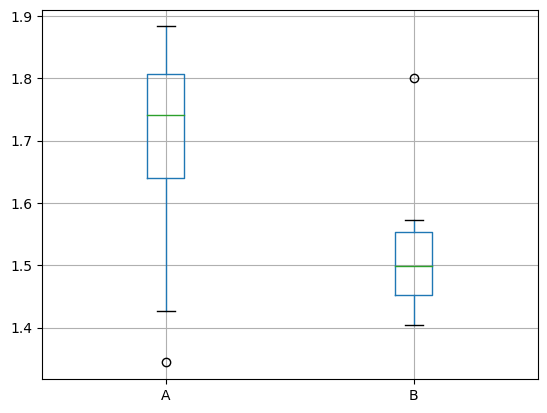

In [23]:
df = pd.DataFrame({'A': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                   'B': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.800]})

df.boxplot(['A', 'B'])
plt.show()

In [24]:
statistic, p = stats.shapiro(df['A'])
print("statistic={}, p-value={}".format(statistic, p))
statistic, p = stats.shapiro(df['B'])
print("statistic={}, p-value={}".format(statistic, p))
stats.bartlett(df['A'], df['B'])

statistic=0.8425754904747009, p-value=0.08004532009363174
statistic=0.8393934369087219, p-value=0.07424874603748322


BartlettResult(statistic=1.2899966318541203, pvalue=0.25604857136527204)

A와 B 모두 p-value가 0.05보다 크므로 정규분포를 따른다고 볼 수 있다.

In [25]:
t_result = stats.ttest_ind(df['A'], df['B'], equal_var = True)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
t:1.94
p:0.073


문제에서의 귀무가설은 '공급자 간에 모평균에는 차이가 없다'는 것이다.

유의수준 5%에서 검정결과 p-value가 0.073이므로 귀무가설을 받아들인다.

따라서 공급자 간에 모평균에는 차이가 없다고 할 수 있다.

### 실습14 (Paired t-test): 짝을 이루는 집단의 평균의 차이가 있는지 검정

In [26]:
df1 = pd.DataFrame({'before': [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

t_result = stats.ttest_rel(df1, df2)
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [27]:
print("Paired t-test")
print("t:{}".format(t))
print("p:{}".format(p))

Paired t-test
t:[-2.266]
p:[0.05]


문제에서의 귀무가설은 '회사원이 영어 학원 가기 전/후의 영어 점수 차이가 없다'는 것이다.

유의수준 5%에서 검정결과 p-value가 0.05이므로 귀무가설을 기각하고 대립가설을 받아들인다.

따라서 학원 수강 전과 후의 점수는 차이가 있다고 볼 수 있다.

### 실습15 (1 Proportion test)

In [28]:
count = 40
n_obs = 100
value = 0.5

z, p = proportions_ztest(count, n_obs, value)

In [29]:
print("1 Proportion test")
print("z: {0:0.3f}".format(z))
print("p:{0:0.3f}".format(p))

1 Proportion test
z: -2.041
p:0.041


문제에서의 귀무 가설은 '동전이 일반 동전과 같이 앞, 뒷면의 나올 확률이 각각 0.5'라는 것이다.

p-value가 0.041로 유의 수준 0.05 보다 낮으므로 귀무 가설을 기각하고 대립 가설을 받아들인다.

따라서 동전이 일반 종전 대비 앞면, 혹은 뒷면이 나올 확률이 차이가 있다고 할 수 있다.

### 실습16 (2 Proportion test)

In [30]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])

z, p = proportions_ztest(count, nobs)

In [31]:
print("2 Proportion test")
print('z: {0:0.3f}'.format(z))
print("p:{0:0.3f}".format(p))

2 Proportion test
z: 2.073
p:0.038


문제에서의 귀무 가설은 두 공장의 불량률이 차이가 없다는 것이다.

p-value가 0.038로 유의수준 0.05 보다 낮으므로 귀무 가설을 기각하고 대립 가설을 받아들인다.

따라서 두 공장의 불량률은 차이가 있다고 할 수 있다.

### 실습(카이제곱 검정, chi-square test)

In [32]:
df = pd.DataFrame({'A':[18, 1, 8, 7, 10, 9, 10],
                   'B':[8, 2, 14, 5, 5, 9 ,4],
                   'C':[4, 1, 3, 4, 9, 5, 4],
                   'D':[4, 1, 2, 3, 2, 7, 3],
                   'E':[3, 1, 3, 1, 1, 1, 1],
                   'F':[3, 25, 8, 10, 2, 1, 7]})

chi, pval, dof, expected = stats.chi2_contingency(df)

print("chi-square test")
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq: 98.274
p: 0.000
degree pf freedom: 30
expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


In [33]:
#전체 구간수
print("전체 구간수는 " + str(30) +'이다')
print("chi-square limit:", str(43.77))

전체 구간수는 30이다
chi-square limit: 43.77


귀무 가설은 '각 제품의 이미지에 대해 차이가 없다'이며 대립 가설은 '각 제품의 이미지에 대해 차이가 있다'이다.

유의수준은 0.05, 임계치는 43.77이므로 카이 제곱의 값이 임계치 보다 크게 되므로 귀무가설을 기각하게 된다.

또한 검정 결과 p-value는 0으로 유의수준 0.05보다 작아 귀무가설을 기각하게 된다.
앞선 두 가지의 계산 결과로 각 제품의 이미지에 대해 차이가 있다는 걸 알 수 있다. 

### 실습 (ANOVA)

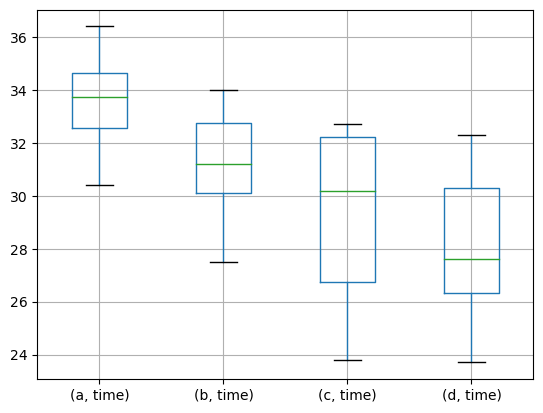

In [34]:
df = pd.read_csv(os.path.join(folder_path, 'ANOVA.csv'))
df
df_ANOVA = df.groupby('gangjong')
df_ANOVA.boxplot(['a', 'b', 'c', 'd'])
df_TYPE = df.groupby('type')
plt.show()

In [35]:
df_gangjong = pd.DataFrame({'a':list(df.loc[df['gangjong'] == 'a']['time']),
                            'b':list(df.loc[df['gangjong'] == 'b']['time']),
                            'c':list(df.loc[df['gangjong'] == 'c']['time']),
                            'd':list(df.loc[df['gangjong'] == 'd']['time'])
                            })

In [36]:
df_gangjong

,a,b,c,d
0,32.2,33.1,32.6,26.7
1,30.4,29.9,32.7,28.5
2,33.6,31.7,29.3,30.9
3,36.4,27.5,25.9,26.2
4,33.9,34.0,31.1,32.3
5,34.9,30.7,23.8,23.7


In [37]:
df_type = pd.DataFrame({'a':list(df.loc[df['type'] == 'a']['time']),
                        'b':list(df.loc[df['type'] == 'b']['time'])
                        })

In [38]:
statistic, p = stats.shapiro(df_gangjong['a'])
print("statistic={}, p-value={}".format(statistic, p))
print()
statistic, p = stats.shapiro(df_gangjong['b'])
print("statistic={}, p-value={}".format(statistic, p))
print()
statistic, p = stats.shapiro(df_gangjong['c'])
print("statistic={}, p-value={}".format(statistic, p))
print()
statistic, p = stats.shapiro(df_gangjong['d'])
print("statistic={}, p-value={}".format(statistic, p))
print()
stats.bartlett(df_gangjong['a'], df_gangjong['b'], df_gangjong['c'], df_gangjong['d'])

statistic=0.9879403114318848, p-value=0.983557939529419

statistic=0.9769707918167114, p-value=0.9355478286743164

statistic=0.8929420113563538, p-value=0.3338908553123474

statistic=0.9713904857635498, p-value=0.901641845703125



BartlettResult(statistic=1.8729084232387967, pvalue=0.5991991808067023)

In [39]:
statistic, p = stats.shapiro(df_type['a'])
print("statistic={}, p-value={}".format(statistic, p))
print()
statistic, p = stats.shapiro(df_type['b'])
print("statistic={}, p-value={}".format(statistic, p))
print()
stats.bartlett(df_gangjong['a'], df_gangjong['b'])

statistic=0.982139527797699, p-value=0.9907686114311218

statistic=0.9098271131515503, p-value=0.2122616022825241



BartlettResult(statistic=0.05736398821925447, pvalue=0.8107118457530063)

In [40]:
f_result = stats.f_oneway(df_gangjong['a'],df_gangjong['b'],df_gangjong['c'])

f, p = f_result.statistic.round(3), \
        f_result.pvalue.round(3)

print("One-way ANOVA Gangjong")
print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

One-way ANOVA Gangjong
F 통계량: 3.64
p-value: 0.051


In [41]:
f_result = stats.f_oneway(df_type['a'],df_type['b'])

f, p = f_result.statistic.round(3), \
        f_result.pvalue.round(3)

print("One-way ANOVA Gangjong")
print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

One-way ANOVA Gangjong
F 통계량: 9.654
p-value: 0.005


첫번째 귀무가설은 '강종 별로 2차 정련시간의 차이가 없다'이다.
유의수준은 0.05로 p-value가 0.051로 귀무가설을 채택하여 강종 별로 2차 정련 시간에 차이가 없다는 것을 알 수 있다. F 통계량을 고려하면 3.64로 두번째와 비교하여 클래스 별 평균이 크게 다르지 않다는 걸 알 수 있다. 

두번째 귀무가설로 'type 별로 2차 정련시간의 차이가 없다'를 검증해보면 유의수준은 0.05로 p-value가 0.005로 귀무가설을 기각하고 2차 정련 시간에는 차이가 있다는 것을 알 수 있다. F 통계량을 고려하면 9.654로 첫번째와 비교하여 클래스 별 평균이 다소 다르다는 것 또한 알 수 있다.

### 실습(Correlation Analysis)

In [42]:
df_strength = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1,
               36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.9, 37.6, 33, 33.5]
df_temperature = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16,
                  14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

corr, pval = stats.pearsonr(df_strength, df_temperature)
print("Correlation Analysis ")
print('corr:{0:0.3f}'.format(corr))
print("p-value:{0:0.3f}".format(pval))

Correlation Analysis 
corr:-0.726
p-value:0.000


결론 : p-value가 0인 것으로 보아 상관 계수가 의미가 있다고 판단되며 초코칩의 강도와 재료 반죽 온도 간에는 선형적으로 감소하는 상관 관계가 있다고 판단할 수 있다.